In [2]:
import os
import pdfplumber
import pandas as pd
import logging
from pathlib import Path


In [18]:
import os
import pdfplumber

def extract_text_from_pdf(pdf_path):
    """Extracts text from a PDF file."""
    with pdfplumber.open(pdf_path) as pdf:
        all_text = ""
        for page in pdf.pages:
            all_text += page.extract_text() + "\n"
    return all_text

def extract_text_from_folder(folder_path, output_folder='Convert to text'):
    """Extracts text from all PDFs in a folder and saves them as .txt files."""
    # If output folder is None, use default name
    if output_folder is None:
        output_folder = os.path.join(folder_path, "extracted_texts")

    # Create output folder if it doesn't exist
    os.makedirs(output_folder, exist_ok=True)

    # Iterate through all files in the folder
    for root, dirs, files in os.walk(folder_path):
        print('===================================')
        print(f'Processing folder: {root}')
        print(f'Files found: {files}')
        print(f'Number of files found: {len(files)}')
        print('===================================')

        for file in files:
            if file.endswith(".pdf"):
                file_path = os.path.join(root, file)
                
                # Create a safe output filename by replacing unsafe characters with "_"
                safe_folder_name = root.replace(os.sep, "_").replace(":", "_").replace(" ", "_")
                output_filename = f"{safe_folder_name}_{os.path.splitext(file)[0]}.txt"
                output_path = os.path.join(output_folder, output_filename)

                try:
                    # Extract text from PDF
                    extracted_text = extract_text_from_pdf(file_path)

                    # Write extracted text to file
                    with open(output_path, "w", encoding="utf-8") as f:
                        f.write(extracted_text)

                    print(f"Extracted text from {file_path} into {output_filename}")

                except Exception as e:
                    print('===================================')
                    print('===================================')
                    print(f"Error processing {file_path}: {e}")
                    print('===================================')
                    print('===================================')

# Example usage
folder_path = "Train"  # Example folder path containing PDFs
extract_text_from_folder(folder_path)


Processing folder: Train
Files found: []
Number of files found: 0
Processing folder: Train\2023_Q1
Files found: ['24CS_8153961.pdf', '2S_8136241.pdf', '3BBIF_8107061.pdf', '3K-BAT_8197641.pdf', 'A5_8155361.pdf', 'AAI_8117761.pdf', 'AAV_8152181.pdf', 'ABM_8136021.pdf', 'ACAP_8114311.pdf', 'ACC_2023027055.pdf', 'ACC_8169711.pdf', 'ACE_8151201.pdf', 'ACG_8120521.pdf', 'ADB_8106581.pdf', 'ADD_8130871.pdf', 'ADVANC_8100981.pdf', 'AEONTS_2023042322.pdf', 'AE_8135251.pdf', 'AFC_8123991.pdf', 'AF_8113021.pdf', 'AGE_8110451.pdf', 'AHC_8132951.pdf', 'AH_8129691.pdf', 'AIE_8141231.pdf', 'AIMCG_8168231.pdf', 'AIRA_8162741.pdf', 'AIT_8098261.pdf', 'AI_8141731.pdf', 'AJA_8134861.pdf', 'AJ_8170071.pdf', 'AKP_8149101.pdf', 'AKR_8164541.pdf', 'AKS_8171611.pdf', 'ALLA_8135221.pdf', 'ALLY_8155541.pdf', 'ALLY_8196041.pdf', 'ALL_8149791.pdf', 'ALPHAX_8156961.pdf', 'ALT_8103361.pdf', 'ALUCON_8153501.pdf', 'AMANAH_8114041.pdf', 'AMARC_8127921.pdf', 'AMARIN_8132431.pdf', 'AMATAV_8132731.pdf', 'AMATA_8165531.p

In [19]:
def create_csv_from_txt(folder_path, output_csv_path):
    data = []
    
    for filename in os.listdir(folder_path):
        if filename.endswith('.txt'):  # ตรวจสอบว่าเป็นไฟล์ .txt
            filepath = os.path.join(folder_path, filename)
            with open(filepath, 'r', encoding='utf-8') as file:
                content = file.read().strip()  # อ่านเนื้อหาไฟล์และตัดช่องว่างที่ไม่จำเป็น
                data.append({'Filename': filename, 'content': content})
    
    # สร้าง DataFrame
    df = pd.DataFrame(data)
    
    # บันทึกเป็น CSV โดยใช้ escapechar
    df.to_csv(output_csv_path, index=False, encoding='utf-8-sig', escapechar='\\')  # เพิ่ม escapechar
    print(f"บันทึกไฟล์ CSV เรียบร้อย: {output_csv_path}")

# ตัวอย่างการใช้งาน
folder_path = "Convert to text"  # เปลี่ยนเป็น path ของโฟลเดอร์ที่มีไฟล์ .txt
output_csv_path = "txt_csv.csv"  # เปลี่ยนเป็น path ของไฟล์ .csv ที่ต้องการบันทึก
create_csv_from_txt(folder_path, output_csv_path)


บันทึกไฟล์ CSV เรียบร้อย: txt_csv.csv


In [1]:
import time
import pandas as pd

print("Loading data file now, this could take a while depending on file size")
start = time.time()
df = pd.read_csv('txt_csv.csv') # ADD-CSV
end = time.time()
print("Loading took " + str(round(end - start, 2)) + " seconds")
missing_values = df.isna().sum().sum()
duplicated_values = df.duplicated().sum()
print(f'\nMissing values: {missing_values}')
print(f'Duplicated values: {duplicated_values}')
if missing_values >= 1:
    print('\nMissing values by column:')
    print(df.isna().sum())
print("\nUnique Values in Each Column:")
print(df.nunique())

Loading data file now, this could take a while depending on file size
Loading took 0.8 seconds

Missing values: 446
Duplicated values: 0

Missing values by column:
Filename      0
content     446
dtype: int64

Unique Values in Each Column:
Filename    2765
content     2290
dtype: int64


In [2]:
df.dropna(inplace=True)

In [3]:
import re
import numpy as np
def clean_text(text):
    if pd.isna(text):
        return np.nan
    text = re.sub(r'Ã[\x80-\xBF]+', ' ', text)
    text = re.sub(r'[^ก-ฮะ-์\s]', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    text = text.strip()
    return text.lower()


from pythainlp.corpus.common import thai_stopwords
from pythainlp import word_tokenize
import numpy as np
thai_stopwords = list(thai_stopwords())
def text_process(text):
    if pd.isna(text):  # ตรวจสอบว่า text เป็น NaN หรือไม่
        return np.nan
    final = "".join(u for u in text if u not in ("?", ".", ";", ":", "!", '"', "ๆ", "ฯ", ",", "(", ")", "[", "]", "{", "}", "...", "-", "_", "/", "\\", "|", "@", "#", "$", "%", "^", "&", "*", "~", "`", "'", "‘", "’", "“", "”", " ",))
    final = word_tokenize(final)
    final = " ".join(word for word in final)
    final = " ".join(word for word in final.split() 
                     if word.lower not in thai_stopwords)
    return final

In [4]:
from fixthaipdf import clean
import time


print("กำลังเริ่มการ clean text...")
start_time = time.time()
df['content'] = df['content'].apply(clean_text)
print(f"ใช้เวลาในกระบวนการ clean text: {time.time() - start_time:.2f} วินาที\n")

print("กำลังเริ่มการตรวจสอบการสะกด...")
start_time = time.time()
df['content'] = df['content'].apply(lambda x: clean(x) if pd.notna(x) else x)
print(f"ใช้เวลาในกระบวนการตรวจสอบการสะกด: {time.time() - start_time:.2f} วินาที\n")

print("กำลังเริ่มการ tokenization...")
start_time = time.time()
df['Text_tokens'] = df['content'].apply(text_process)
print(f"ใช้เวลาในกระบวนการ tokenization: {time.time() - start_time:.2f} วินาที\n")

print("กระบวนการทั้งหมดเสร็จสิ้น")


กำลังเริ่มการ clean text...
ใช้เวลาในกระบวนการ clean text: 1.91 วินาที

กำลังเริ่มการตรวจสอบการสะกด...
ใช้เวลาในกระบวนการตรวจสอบการสะกด: 178.13 วินาที

กำลังเริ่มการ tokenization...
ใช้เวลาในกระบวนการ tokenization: 101.49 วินาที

กระบวนการทั้งหมดเสร็จสิ้น


In [5]:
pd.set_option('display.max_colwidth', None)
print(df.iloc[0]['content'])
print(df.iloc[0]['Text_tokens'])

ที่วนัที่พฤษภาคม เรื่อง การวิเคราะห์และคา อธิบายของฝ่ายจดัการ สา หรับงวดสามเดือนสิ้นสุดวนัที่มีนาคม เรียน กรรมการและผจู้ดัการ ตลาดหลกัทรัพยแ์ ห่งประเทศไทย บริษทัทเวนตี้ โฟร์ คอน แอนด์ ซัพพลาย จา กัด มหาชน บริษทัขอนำส่งการวิเคราะห์และคา อธิบายของ ฝ่ายจดัการสา หรับงวดสามเดือนสิ้นสุดวนัที่มีนาคม ดงันี้รายได้จากการก่อสร้าง ไตรมาส ปีบริษัทมีรายได้จากการก่อสร้างจำนวน ล้านบาทเพิ่มขึ้นจากปีก่อนจำนวน ล้านบาท หรือคิดเป็นอตัรำเพิ่มขึ้นร้อยละ การเพิ่มขึ้นของรายไดจ้ำกการก่อสร้างในไตรมาส ปี เมื่อเทียบกบัปีก่อนหน้า มีเหตุผลสำคญัมาจากการที่บริษทัชนะประมูลโครงการขนาดใหญ่ที่สำคญัที่ต่อเนื่องหลายโครงการ รวมถึงจา นวน และมูลค่าของโครงการที่อยู่ระหว่างก่อสร้างและรับรู้รายไดใ้นปีสูงกว่าปีก่อนหน้า โดยในปีบริษทัมีโครงการ ก่อสร้างที่สำคญั ไดแ้ก่ โครงการก่อสร้างงานระบบประกอบอาคาร รายไดเ้พิ่มขึ้น ล้านบาท และ โครงการ รายไดเ้พิ่มขึ้น ล้านบาท รายได้จากการขายสินค้า ไตรมาส ปีบริษัทมีรายได้จากการขายสินค้าเท่ากับ ล้านบาทเพิ่มขึ้นจากปีก่อนหน้าจำนวน ล้านบาท หรือคิดเป็นอตัรำเพิ่มขึ้นร้อยละ เนื่องจากบริษทั เร่งการส่งมอบวสัด

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(analyzer=lambda x:x.split(' '))
cvec.fit_transform(df['Text_tokens'])
cvec.vocabulary_

{'ที่': 17005,
 'วนัที่': 36023,
 'พฤษภาคม': 25346,
 'เรื่อง': 54643,
 'การ': 2029,
 'วิเคราะห์': 36762,
 'และ': 57126,
 'คา': 5797,
 'อธิบาย': 44478,
 'ของ': 3813,
 'ฝ่าย': 24688,
 'จ': 7763,
 'ดัก': 12082,
 'าร': 48739,
 'สา': 41181,
 'หรับ': 42751,
 'งวด': 6645,
 'สาม': 41203,
 'เดือน': 52945,
 'สิ้นสุด': 41366,
 'มีนาคม': 28788,
 'เรียน': 54617,
 'กรรมการ': 1375,
 'ผ': 23824,
 'จู้': 8624,
 'ตลาด': 13563,
 'หลกัทรัพยแ์ห่ง': 43018,
 'ประเทศ': 23228,
 'ไทย': 60213,
 'บ': 21384,
 'ริ': 33522,
 'ษทัท': 37789,
 'เวน': 54885,
 'ตี้': 14440,
 'โฟร์': 57872,
 'คอน': 5601,
 'แอนด์': 57221,
 'ซัพพลาย': 10038,
 'จา': 8486,
 'กัด': 1833,
 'มหาชน': 28129,
 'ษทัข': 37655,
 'อนำ': 44513,
 'ส่ง': 41622,
 'มี': 28767,
 'นาค': 20083,
 'มด': 27527,
 'งัน': 6951,
 'ี้': 50958,
 'รายได้': 33503,
 'จาก': 8487,
 'ก่อสร้าง': 3014,
 'ไตรมาส': 60201,
 'ปี': 23666,
 'บริษัท': 21702,
 'จำนวน': 8512,
 'ล้าน': 35493,
 'บาท': 22628,
 'เพิ่มขึ้น': 54148,
 'ปีก่อน': 23669,
 'หรือ': 42757,
 'คิด': 5905,
 'เป็น': 53

In [7]:
import pandas as pd
import re

def check_section_exists(text, keywords):
    text_lower = str(text).lower()
    return 'Y' if any(keyword.lower() in text_lower for keyword in keywords) else 'N'

def process_csv(data, output_file):
    sections = {
        'ภาพรวม': ['สรุป', 'การดำเนินงาน', 'ผลการดำเนินงาน', 'สถานการณ์'],
        'สภาวะตลาด': ['ราคาขาย', 'ส่วนแบ่ง', 'การปรับตัว', 'ตลาด'],
        'สรุปการผลการดำเนินงาน': ['กำไรสุทธิ', 'รายได้', 'อัตรากำไร', 'รายงานผล', 'การเปลี่ยนแปลง'],
        'เหตุการณ์สำคัญ': ['การเปลี่ยนแปลง', 'การเพิ่มขึ้น', 'การปรับตัว','สถานการณ์'],
        'ปัจจัยต่อการเติบโต': ['ราคาขายเฉลี่ย', 'การบริหาร', 'สินค้าคงคลัง', 'การเพิ่มขึ้นของรายได้'],
        'เปิดเผยรายได้': ['รายได้จากการขาย', 'การเพิ่มขึ้นของรายได้', 'ราคาขาย'],
        'เปิดเผยกำไรที่เปลี่ยนไป': ['กำไรสุทธิ', 'การเพิ่มขึ้น', 'การเปลี่ยนแปลงกำไร'],
        'คำอธิบายราย': ['การอธิบาย', 'สาเหตุ', 'ผลลัพธ์']
    }
    
    # Add new columns with Y/N flags
    for section, keywords in sections.items():
        df[section] = df['Text_tokens'].apply(lambda x: check_section_exists(x, keywords))
    
    # Save to new CSV
    df.to_csv(output_file, index=False, encoding='utf-8-sig')
    
    print(f"Processing complete. Output saved to {output_file}")

df.drop(['content'], axis=1, inplace=True)
process_csv(df, 'NLP.csv')

Processing complete. Output saved to NLP.csv


In [17]:
import time
import pandas as pd

print("Loading data file now, this could take a while depending on file size")
start = time.time()
df = pd.read_csv('NLP.csv') # ADD-CSV
end = time.time()
print("Loading took " + str(round(end - start, 2)) + " seconds")
missing_values = df.isna().sum().sum()
duplicated_values = df.duplicated().sum()
print(f'\nMissing values: {missing_values}')
print(f'Duplicated values: {duplicated_values}')
if missing_values >= 1:
    print('\nMissing values by column:')
    print(df.isna().sum())
print("\nUnique Values in Each Column:")
print(df.nunique())

Loading data file now, this could take a while depending on file size
Loading took 0.76 seconds

Missing values: 23
Duplicated values: 0

Missing values by column:
Filename                    0
Text_tokens                23
ภาพรวม                      0
สภาวะตลาด                   0
สรุปการผลการดำเนินงาน       0
เหตุการณ์สำคัญ              0
ปัจจัยต่อการเติบโต          0
เปิดเผยรายได้               0
เปิดเผยกำไรที่เปลี่ยนไป     0
คำอธิบายราย                 0
dtype: int64

Unique Values in Each Column:
Filename                   2319
Text_tokens                2257
ภาพรวม                        2
สภาวะตลาด                     2
สรุปการผลการดำเนินงาน         2
เหตุการณ์สำคัญ                2
ปัจจัยต่อการเติบโต            2
เปิดเผยรายได้                 2
เปิดเผยกำไรที่เปลี่ยนไป       2
คำอธิบายราย                   2
dtype: int64


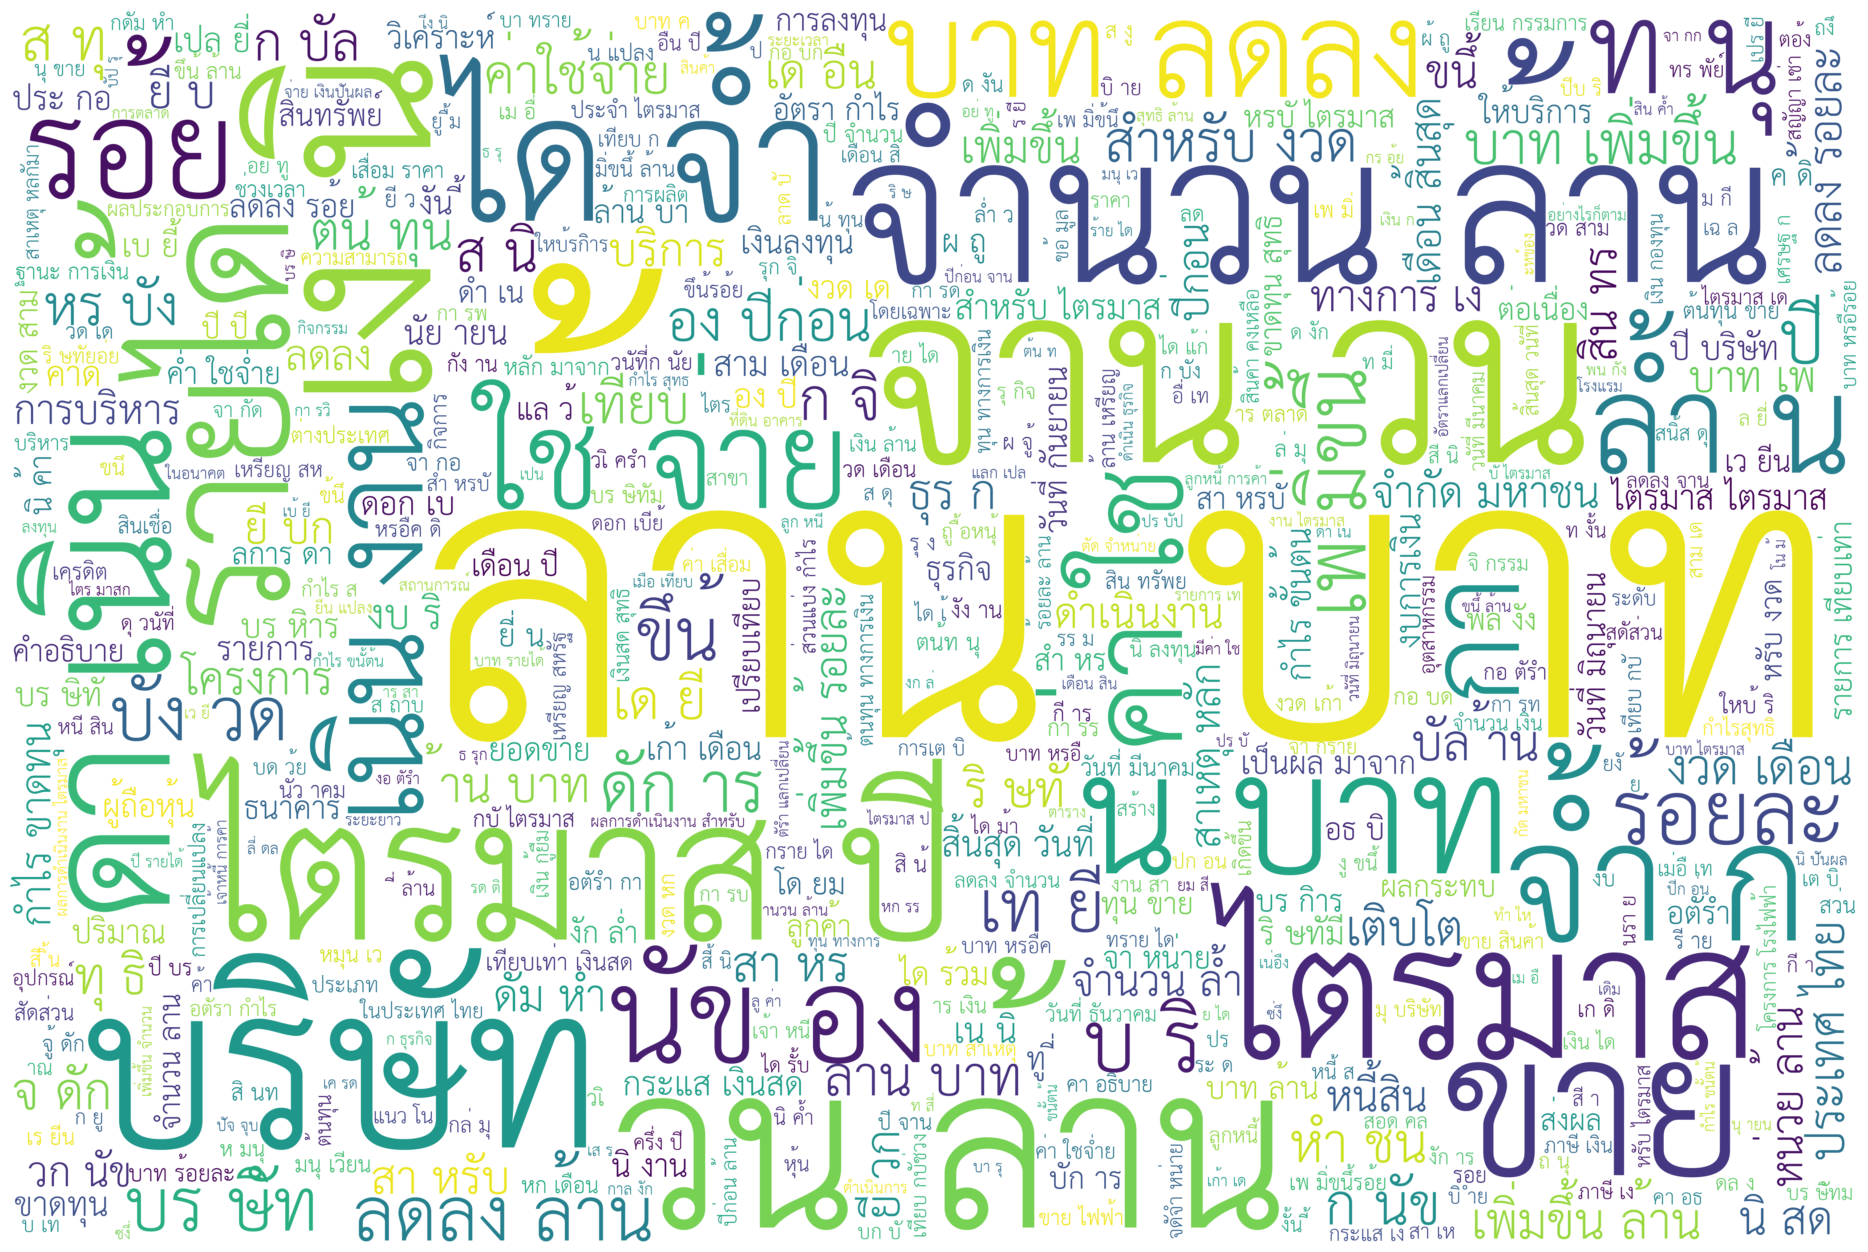

In [21]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from pythainlp.corpus import thai_stopwords

fp = 'THSarabunNew.ttf'
thai_stopwords = set(thai_stopwords())

df_pos = df.dropna(subset=['Text_tokens'])
pos_word_all = " ".join(text for text in df_pos['Text_tokens'] if isinstance(text, str))
reg = r"[ก-๙a-zA-Z']+"

wordcloud = WordCloud(stopwords=thai_stopwords,background_color='white',max_words=500,height=4000,width=6000,font_path=fp,regexp=reg).generate(pos_word_all)
plt.figure(figsize=(30, 16))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')  # ซ่อนแกน
plt.show()


In [9]:
df.drop(['Text_tokens'], axis=1, inplace=True)
df['Filename'] = df['Filename'].str.replace('.txt', '', regex=False)

In [10]:
df.head()

,Filename,ภาพรวม,สภาวะตลาด,สรุปการผลการดำเนินงาน,เหตุการณ์สำคัญ,ปัจจัยต่อการเติบโต,เปิดเผยรายได้,เปิดเผยกำไรที่เปลี่ยนไป,คำอธิบายราย
0,Train_2023_Q1_24CS_8153961,N,Y,Y,N,N,N,Y,Y
1,Train_2023_Q1_2S_8136241,Y,Y,N,N,N,Y,N,Y
2,Train_2023_Q1_3BBIF_8107061,N,N,Y,N,N,N,Y,N
3,Train_2023_Q1_3K-BAT_8197641,N,Y,Y,N,Y,N,N,Y
4,Train_2023_Q1_A5_8155361,Y,Y,Y,Y,Y,N,N,Y


In [11]:
def calculate_report_quality(row):
    # นับจำนวน Y ในคอลัมน์ที่เกี่ยวข้อง (ยกเว้นคอลัมน์ Filename และ Report_quality)
    count_y = sum(1 for value in row[1:] if value == 'Y')
    
    # กำหนดค่า Report_quality ตามเงื่อนไข
    if count_y >= 4:
        return 'A'
    elif count_y <= 2:
        return 'C'
    else:
        return 'B'


# เพิ่มคอลัมน์ Report_quality โดยใช้ฟังก์ชัน
df['Report_quality'] = df.apply(calculate_report_quality, axis=1)

# เปลี่ยนการจัดเรียงคอลัมน์ให้ Report_quality ต่อหลัง Filename
df = df[['Filename', 'Report_quality'] + [col for col in df.columns if col not in ['Filename', 'Report_quality']]]
df = df.sort_values(by='Filename')



In [12]:
df.head()

,Filename,Report_quality,ภาพรวม,สภาวะตลาด,สรุปการผลการดำเนินงาน,เหตุการณ์สำคัญ,ปัจจัยต่อการเติบโต,เปิดเผยรายได้,เปิดเผยกำไรที่เปลี่ยนไป,คำอธิบายราย
0,Train_2023_Q1_24CS_8153961,A,N,Y,Y,N,N,N,Y,Y
1,Train_2023_Q1_2S_8136241,A,Y,Y,N,N,N,Y,N,Y
2,Train_2023_Q1_3BBIF_8107061,C,N,N,Y,N,N,N,Y,N
3,Train_2023_Q1_3K-BAT_8197641,A,N,Y,Y,N,Y,N,N,Y
4,Train_2023_Q1_A5_8155361,A,Y,Y,Y,Y,Y,N,N,Y


In [13]:
df['Filename'] = df['Filename'].str.slice(start=13)
df['Filename'] = df['Filename'].str.lstrip('_')

In [14]:
try:
    df.to_csv('classified_with_quality.csv', index=False, encoding='utf-8-sig')
    print("บันทึกไฟล์สำเร็จ")
except Exception as e:
    print(f"เกิดข้อผิดพลาดในการบันทึกไฟล์: {str(e)}")

บันทึกไฟล์สำเร็จ
